In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
#data_path = Path('data')/'customer_dim.csv'
customer_df = pd.read_csv('data/customer_dim.csv', encoding='ISO-8859-1')
fact_df = pd.read_csv('data/fact_table.csv', encoding='ISO-8859-1') #time_key
time_df = pd.read_csv('data/time_dim.csv', encoding='ISO-8859-1') #time_key
transaction_df = pd.read_csv('data/Trans_dim.csv', encoding='ISO-8859-1') #time_key
item_df = pd.read_csv('data/item_dim.csv', encoding='ISO-8859-1')
store_df = pd.read_csv('data/store_dim.csv', encoding='ISO-8859-1')

transaction_df.head()

,payment_key,trans_type,bank_name
0,P001,cash,None
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


Possible Goals: quarter prediction sales ig, transaction type, upazila analysis, loyalty program, 

In [23]:
fact_df = pd.merge(fact_df, transaction_df, how='left', on='payment_key')
fact_df = pd.merge(fact_df, customer_df, how = 'left', on = 'coustomer_key')
fact_df = pd.merge(fact_df, time_df, how='left', on='time_key')
fact_df = pd.merge(fact_df, item_df, how='left', on='item_key')
fact_df = pd.merge(fact_df, store_df, how = 'left', on = 'store_key')
fact_df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,trans_type,...,year,item_name,desc,unit_price_y,man_country,supplier,unit_y,division,district,upazila
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,card,...,2016,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0,card,...,2018,Charmin Ultra Bath Tissue,Kitchen Supplies,26.0,Bangladesh,DENIMACH LTD,rolls,DHAKA,DHAKA,CANTONMENT
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0,card,...,2016,Dole Fruit in Gel Cups 4.3 oz,Food - Healthy,12.5,poland,CHROMADURLIN S.A.S,ct,CHITTAGONG,NOAKHALI,BEGUMGANJ
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0,card,...,2020,Paper Bowls 20 oz Ultra Strong,Dishware - Bowls,14.0,Bangladesh,DENIMACH LTD,ct,RANGPUR,RANGPUR,KAUNIA
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0,card,...,2014,Waterloo Sparkling Watermelon 12oz,a. Beverage Sparkling Water,8.0,poland,CHROMADURLIN S.A.S,cans,CHITTAGONG,KHAGRACHHARI,MATIRANGA


In [24]:
fact_df = fact_df.rename(columns ={'unit_x':'unit','unit_price_x':'unit_price'})
df = fact_df.drop(columns=['payment_key','time_key','item_key','store_key','unit_price_y','unit_y'])

Text(0.5, 1.0, 'Each Year Total Price')

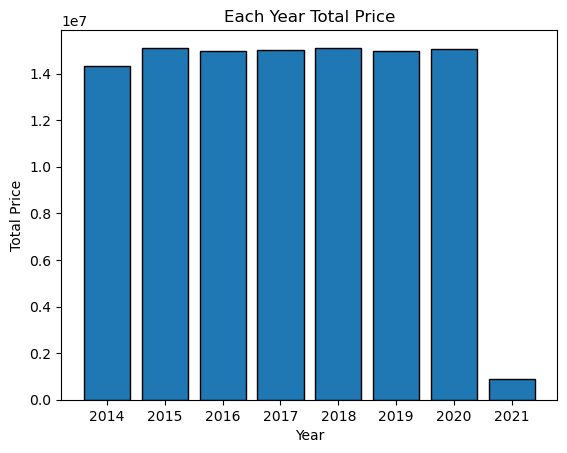

In [25]:
annual_price = df.groupby('year')[['total_price']].sum().reset_index()
plt.bar(annual_price['year'], annual_price['total_price'], edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.title('Each Year Total Price')

Text(0, 0.5, 'Quantaty')

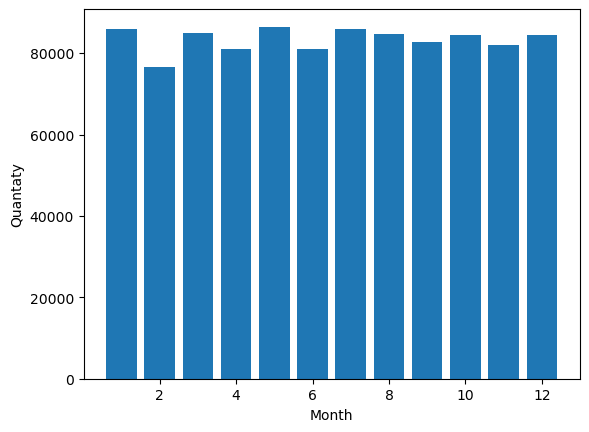

In [26]:
quantaty_total_month = df.groupby('month')[['quantity']].count().reset_index()

plt.bar(quantaty_total_month['month'],quantaty_total_month['quantity'])
plt.xlabel('Month')
plt.ylabel('Quantaty')

In [27]:
a = df.groupby(["month","year"])["quantity"].sum().to_frame()
a

quantity
month year          
1     2014     28280
      2015     70575
      2016     68836
      2017     73889
      2018     73564
...              ...
12    2016     69928
      2017     68936
      2018     75316
      2019     69469
      2020     76596

[85 rows x 1 columns]

In [15]:
df['item_combined'] = df['quantity'].astype(str)+' ' + df['item_name']

combined.groupby('upazila').agg({'total_price':'sum','quantity':'sum', 'date': lambda x: list(x),'bank_name': lambda x: list(x),'trans_type': lambda x: list(x),'item_combined':lambda x: list(x),'division':'max','district':'max'})

Get all the recurring customers upazila 

In [28]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)

KeyboardInterrupt: 

In [18]:
grouped = df[['coustomer_key','date','total_price','quantity','item_combined','upazila']]
grouped = grouped.groupby(['upazila','coustomer_key']).agg({'total_price':'sum','quantity':'sum','date': lambda x: list(x),'item_combined':lambda x: list(x)})
grouped[grouped['date'].apply(len)> 1]

total_price  quantity  \
upazila    coustomer_key                          
ABHAYNAGAR C000014              170.0        10   
           C000086              284.0        18   
           C000186              198.0        11   
           C000410              548.0        19   
           C000511              176.0        12   
...                               ...       ...   
ZIANAGAR   C008979              365.0        21   
           C009049              184.0        14   
           C009067               54.0         5   
           C009078               85.0         5   
           C009143              184.5        11   

                                                                       date  \
upazila    coustomer_key                                                      
ABHAYNAGAR C000014                     [11-06-2016 08:39, 11-02-2018 18:44]   
           C000086                     [14-03-2016 12:58, 22-07-2020 23:32]   
           C000186                     [07-07-2020 22:43, 25-10-2020 14:33]   
           C000410                     [16-04-2020 02:56, 07-04-2018 01:49]   
           C000511                     [19-06-2020 08:00, 25-01-2018 00:06]   
...                                                                     ...   
ZIANAGAR   C008979        [02-04-2014 08:46, 01-10-2014 11:23, 06-12-202...   
           C009049                     [10-02-2020 18:49, 27-09-2020 21:30]   
           C009067                     [14-02-2016 10:03, 04-10-2016 21:20]   
           C009078                     [19-01-2017 13:15, 07-01-2020 09:48]   
           C009143                     [26-07-2018 17:16, 08-02-2019 18:54]   

                                                              item_combined  
upazila    coustomer_key                                                     
ABHAYNAGAR C000014        [5 100% Juice Box Variety 6.75 oz , 5 Mars Cho...  
           C000086        [8 Nat.Valley PeanutButter Protein Bars, 10 Na...  
           C000186        [6 Unsalted Premium Blend Nuts, 5 Veggie Chips...  
           C000410        [9 K Cups - McCafe Premium Roast, 10 Pure Leaf...  
           C000511        [10 La Croix Sparkling Lime 12 oz, 2 Gatorade ...  
...                                                                     ...  
ZIANAGAR   C008979        [11 Premier Protein Shake Choc. 11oz, 1 Nature...  
           C009049        [8 Strong Everyday Napkins, 6 Double Bubble Va...  
           C009067        [2 K Cups - Green Tea, 3 Altoids Small Packs V...  
           C009078        [1 Paper Plates 7 inch  Ultra Strong, 4 Stirre...  
           C009143           [9 Hershey Nuggets, 2 Coke Classic 12 oz cans]  

[103673 rows x 4 columns]

In [19]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
[df.groupby('division').count()['payment_key'].idxmax(),df.groupby('district').count()['payment_key'].idxmax(),df.groupby('upazila').count()['payment_key'].idxmax()]


KeyboardInterrupt: 

In [ ]:
pd.date